In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv('heart.csv')

print(data.head())
data.dropna()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [26]:
#cleaning from NA
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


df = data

y =np.array(df['target'])
X = np.array(df.loc[:, df.columns != 'target'])

    

In [27]:
n=5
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fvalue_selector = SelectKBest(f_classif, k=n)
X_kbest = fvalue_selector.fit_transform(X, y)
X_wybrany = X_kbest

wybrane = fvalue_selector.get_support()
#col_loc = np.where(wybrane==True)[0]

print(wybrane)
X=X[:,[2,7,8,9,11]]

[False False  True False False False False  True  True  True False  True
 False]


In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(X[:,3],X[:,4],c=y)
#plt.xlim(-0.5,  3)
#plt.ylim(-2, 3)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import random 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
random.seed(13)
from datetime import datetime
#X_n=X_kbest[:,:n-1]
#y_n=X_kbest[:,n-1]

X_train,  X_test, y_train, y_test = train_test_split(X, y,test_size=0.31,random_state=4)

params = [0.001,0.01,0.05,0.1 ,0.5,1 ]



print(params)




# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()
# print(rfecv.ranking_)
# print(rfecv.support_)




[0.001, 0.01, 0.05, 0.1, 0.5, 1]


In [29]:
#Grid search for linear kernel

now=datetime.now()
gsc = GridSearchCV(estimator=SVC(kernel='linear'), param_grid={'C': params})
gsc.fit(X_train,y_train)


print(gsc.best_params_)
print(datetime.now() -now)


{'C': 0.1}
0:00:00.122671


In [30]:
#fitting linear kernel

now=datetime.now()
svc_l = SVC(kernel="linear",probability=True,C=0.1)
svc_l.fit(X_train,y_train)
y_pred_svm_linear = svc_l.predict(X_test)
    
    
print('SVM accuracy: %.2f' % accuracy_score(y_test, y_pred_svm_linear))
print(datetime.now() -now)

SVM accuracy: 0.81
0:00:00.021939


In [31]:
#Grid search for rbf kernel
now=datetime.now()

gsc = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid={'C': params,'gamma': params})
gsc.fit(X_train,y_train)


print(gsc.best_params_)
print(datetime.now() -now)

{'C': 1, 'gamma': 0.1}
0:00:00.371008


In [32]:
#fitting rbf kernel
now=datetime.now()
svc_k = SVC(kernel='rbf',probability=True,C=1,gamma=0.01)
svc_k.fit(X_train,y_train)
y_pred_svm_rbf = svc_k.predict(X_test)


print('SVM accuracy: %.2f' % accuracy_score(y_test, y_pred_svm_rbf))
print(datetime.now() -now)

SVM accuracy: 0.74
0:00:00.010994


In [33]:
# grid polynomial
now=datetime.now()

gsc = GridSearchCV(estimator=SVC(kernel='poly',degree=2), param_grid={'C':params})
gsc.fit(X_train,y_train)


print(gsc.best_params_)
print(datetime.now() -now)

{'C': 0.001}
0:01:03.944468


In [34]:
now=datetime.now()
svc_p = SVC(kernel='poly',C=0.001,probability=True,degree=2)
svc_p.fit(X_train,y_train)
y_pred_svm_pol = svc_p.predict(X_test)


print('SVM accuracy: %.2f' % accuracy_score(y_test, y_pred_svm_pol))
print(datetime.now() -now)

SVM accuracy: 0.80
0:00:00.286267


In [35]:
#params for logistic regression
now=datetime.now()

gsc = GridSearchCV(estimator=LogisticRegression(), param_grid={'C': params})
gsc.fit(X_train,y_train)


print(gsc.best_params_)
print(datetime.now() -now)

{'C': 0.5}
0:00:00.037899


In [36]:
#logistic regression
now=datetime.now()

logreg = LogisticRegression(C=0.5)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print('Log reg: %.2f' % accuracy_score(y_test, y_pred_log))
print(datetime.now() -now)

Log reg: 0.80
0:00:00.002991


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight='balanced')
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))
print(classification_report(y_test, y_pred_svm))

In [ ]:
print(logreg.predict(X_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

ERROR:root:Line magic function `%plt.title` not found.


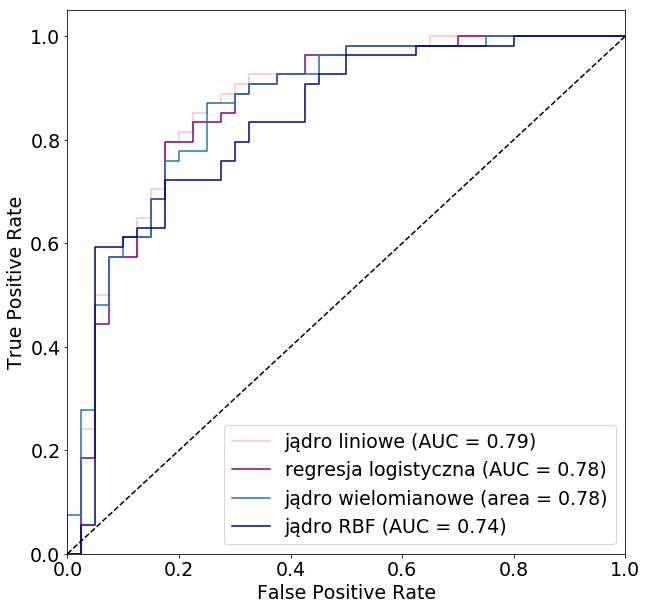

In [37]:
import sklearn.datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
h
logit_roc_auc = roc_auc_score(y_test,y_pred_log)
svm_roc_auc = roc_auc_score(y_test, y_pred_svm_linear)
svm_roc_auc_p = roc_auc_score(y_test, y_pred_svm_pol)
svm_roc_auc_k = roc_auc_score(y_test, y_pred_svm_rbf)
fpr, tpr, thresholds = roc_curve(y_test, svc_l.predict_proba(X_test)[:,1])
fpr_r, tpr_r, thresholds = roc_curve(y_test, svc_k.predict_proba(X_test)[:,1])
fpr_l,tpr_l, thresholds_l=roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr_p,tpr_p, thresholds_l=roc_curve(y_test, svc_p.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='jądro liniowe (AUC = %0.2f)' % svm_roc_auc,color='pink')
plt.plot(fpr_l, tpr_l, label='regresja logistyczna (AUC = %0.2f)' % logit_roc_auc,color='purple')
plt.plot(fpr_p, tpr_p, label='jądro wielomianowe (area = %0.2f)' % svm_roc_auc_p)
plt.plot(fpr_r, tpr_r, label='jądro RBF (AUC = %0.2f)' % svm_roc_auc_k,color ='navy')


plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
%plt.title('Model 2')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_m2')
plt.show()

In [ ]:
print(logit_roc_auc)